In [15]:
from random import random
from numpy import pi, sqrt, sin, cos, mean
import numpy as np
import matplotlib.pyplot as plt

In [16]:
answer = 2 + pi*pi/26 - 2*cos(pi/sqrt(13))

In [17]:
def f(x):
    return 2 * sin(x) + x

In [18]:
def Monte_Carlo(n):
    max_f = f(pi/sqrt(13))
    rectangle = pi/sqrt(13) * max_f
    count = 0
    for _ in range(n):
        x = pi*random()/sqrt(13)
        y = max_f*random()
        if f(x) > y:
            count += 1
    return rectangle * count / n

In [19]:
def const(n):  # постоянная плотность
    res = 0
    for j in range(n):
        ksi = pi*random()/sqrt(13)
        res += f(ksi)
    return res*pi/(sqrt(13)*n)

In [20]:
def linear(n):  # линейная плотность
    res = 0
    for j in range(n):
        ksi = pi*sqrt(random()/13)
        res += f(ksi)/ksi
    return res*pi*pi/(26*n)

In [66]:
def test(k):
    res1 = []
    res2 = []
    res3 = []
    numbers = [2**i for i in range(8, 18)]
    for n in numbers:
        res1.append(abs(mean([const(n) for _ in range(k)])-answer))
        res2.append(abs(mean([linear(n) for _ in range(k)])-answer))
        res3.append(abs(mean([Monte_Carlo(n) for _ in range(k)])-answer))
    fig, ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    plt.xticks(np.log2(numbers))
    ax.plot(np.log2(numbers), res1, label='Const')
    ax.plot(np.log2(numbers), res2, label='Linear')
    ax.plot(np.log2(numbers), res3, label='Monte Carlo')
    ax.legend()
    plt.show()

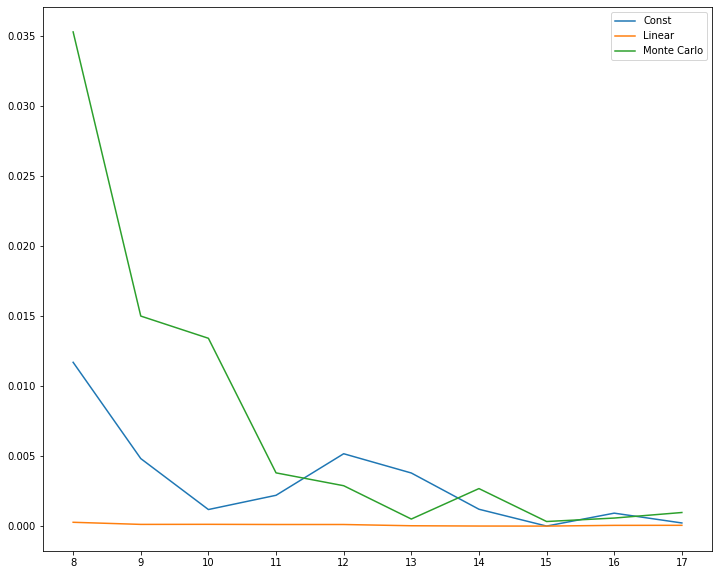

In [67]:
test(10)